<h1>Data Preprocessing</h1>

## Importing Libraries

In [85]:
import re
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
dataset_raw = pd.read_csv('../data/raw/medical_appointment_no_show.csv')

## Data Exploration

Describe the dataset and its features. What are the data types of each feature? Are there any missing values? What is the distribution of the target variable?

### 1. Dataset Overview

In [87]:
# Displaying the first few rows
dataset_raw.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [88]:
# Summary of the dataset
dataset_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [89]:
# Checking the data types of each feature
print("Columns: ", dataset_raw.columns)

Columns:  Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')


In [90]:
# Checking the data types of each feature
print("Data types: ", dataset_raw.dtypes)

Data types:  PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object


In [91]:
# Checking the shape of the dataset
print("Total number of rows: ", dataset_raw.shape[0])
print("Total number of columns: ", dataset_raw.shape[1])

Total number of rows:  110527
Total number of columns:  14


In [92]:
# checking for duplicate values
print("No of duplicates ", dataset_raw.duplicated().sum())

No of duplicates  0


In [93]:
# Checking for missing values
print("Missing values: ", dataset_raw.isnull().sum())

Missing values:  PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64


There is no missing values in the dataset observed.

In [94]:
dataset_raw["Age"].describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

We can observe here there is an age = -1 and that's not logical. we will address it later.

In [25]:
# Unique values patient
print("Unique values in 'patient_id': ", dataset_raw['PatientId'].nunique())

Unique values in 'patient_id':  62299


In [26]:
# Unique values appointment
print("Unique values in 'AppointmentID': ", dataset_raw['AppointmentID'].nunique())

Unique values in 'AppointmentID':  110527


In [27]:
# 'No-show' count
print("No-show count: ", dataset_raw['No-show'].value_counts())

No-show count:  No-show
No     88208
Yes    22319
Name: count, dtype: int64


In [28]:
dataset_raw["PatientId"] = dataset_raw["PatientId"].astype(str)
dataset_raw["AppointmentID"] = dataset_raw["AppointmentID"].astype(str)

In [29]:
dataset_raw["ScheduledDay"] = pd.to_datetime(dataset_raw["ScheduledDay"]).dt.date
dataset_raw["AppointmentDay"] = pd.to_datetime(dataset_raw["AppointmentDay"]).dt.date

In [31]:
dataset_raw["LeadTime"] = (pd.to_datetime(dataset_raw["AppointmentDay"]) - pd.to_datetime(dataset_raw["ScheduledDay"])).dt.days

In [36]:
dataset_raw[dataset_raw["LeadTime"] < 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,LeadTime


### Data Quality Observations
Few records have negative lead time (e.g., -1 or -6), which are logically invalid since appointments cannot be scheduled after the appointment date. These were removed from dataset to ensure model reliability. Let's remove them.

In [37]:
dataset_raw = dataset_raw[dataset_raw["LeadTime"] >= 0].reset_index(drop=True)

In [40]:
# Create a cross-tab: lead time vs. no-show
cross_tab_date_diff = pd.crosstab(dataset_raw["LeadTime"], dataset_raw["No-show"], dataset_raw["No-show"], aggfunc="count", margins=True)

In [41]:
# Keep only valid lead times (e.g., 0-128 days)
cross_tab_date_diff = cross_tab_date_diff.head(129)

# Compute % no-show rate
cross_tab_date_diff["%-Noshow"] = round((cross_tab_date_diff["Yes"] / cross_tab_date_diff["All"]) * 100, 2)

# Reset index for plotting
cross_tab_date_diff.reset_index(inplace=True)

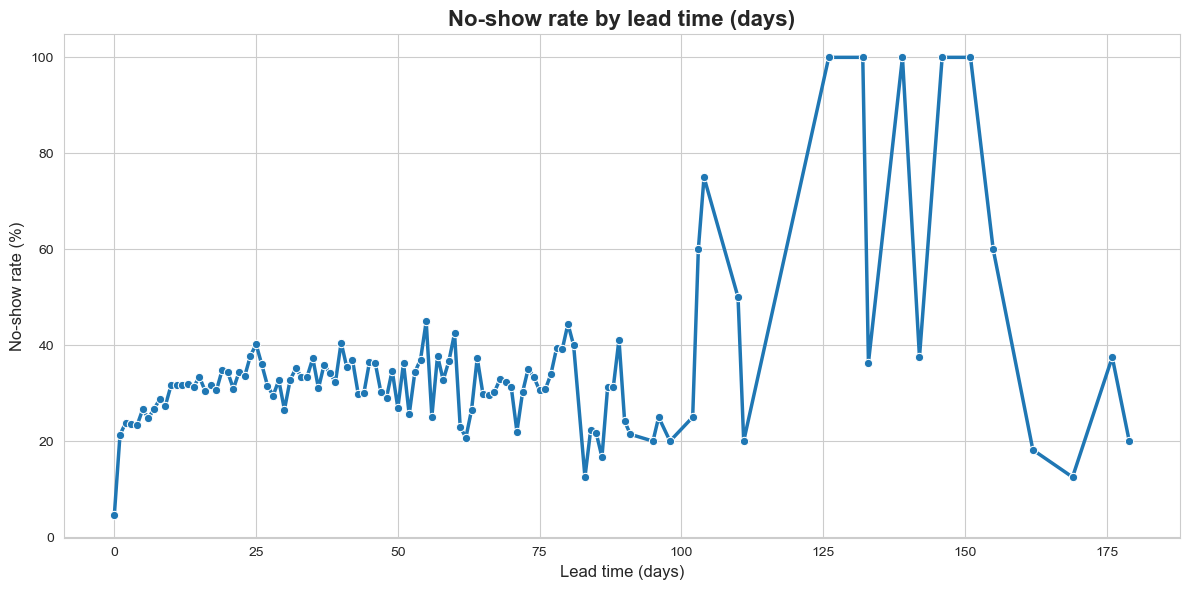

In [42]:
# Plot: No-show rate by lead time
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
sns.lineplot(data=cross_tab_date_diff, x="LeadTime", y="%-Noshow", marker="o", linewidth=2.5)

plt.title("No-show rate by lead time (days)", fontsize=16, weight="bold")
plt.xlabel("Lead time (days)", fontsize=12)
plt.ylabel("No-show rate (%)", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

### No-show Rate vs Lead Time

We examine how the number of days between scheduling and the actual appointment affects patient behavior.
- Higher lead times many increase forgetfulness.
- Very short lead times may indicate emergency/urgent care.

This plot helps us explore such patterns.

### Observations:
The no-show rate is remains fairly stable (~20-40%) for lead times under 90 days, but spikes unpredictability beyond 100 days, likely due to data sparsity or scheduling anomalies.

In [44]:
cross_tab_age = pd.crosstab(dataset_raw["Age"], dataset_raw["No-show"], dataset_raw["No-show"], aggfunc="count", margins=True)

# Age range: 0-103
cross_tab_age = cross_tab_age.head(104)

# Compute % no-show rate
cross_tab_age["%-Noshow"] = round((cross_tab_age["Yes"] / cross_tab_age["All"]) * 100, 2)

# Reset index for plotting
cross_tab_age.reset_index(inplace=True)

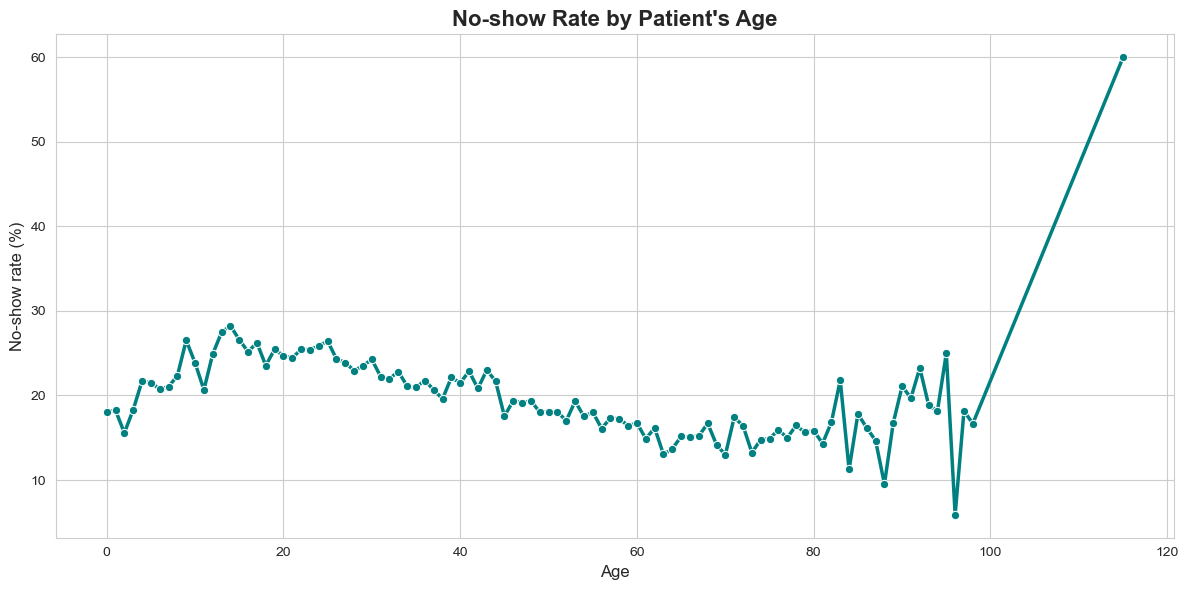

In [46]:
# Plotting
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
sns.lineplot(
    data=cross_tab_age,
    x="Age",
    y="%-Noshow",
    marker="o",
    linewidth=2.5,
    color="teal"
)
plt.title("No-show Rate by Patient's Age", fontsize=16, weight="bold")
plt.xlabel("Age", fontsize=12)
plt.ylabel("No-show rate (%)", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

### No-show rate by Patient's Age

- Ages 0-20
  No-show rates gradually increase to ~28%. this may reflect dependency on parents, school conflicts, or lower perceived urgency.
- Ages 20-60:
  A steady decline in no-show rates (~18-20%) indicates better healthcare responsibility. possibly due to work-related health needs or structured routines.
- Ages 60-90:
  No-Show rates remain relatively stable and low, as this group likely indicates patients with chronic conditions who prioritize appointments.
- Ages 90+:
  Spikes (up to 60%) are visible, but these are likely due to very few data points, making them statistically unreliable.

### Observations:

Young (<20) and very elderly (>100) patients show the highlight no-show rates, while middle-aged adults (20-60) demonstrate the most consistent attendance patterns.

In [47]:
cross_tab_age

No-show,Age,No,Yes,All,%-Noshow
0,-1,1.0,NaN,1,NaN
1,0,2900.0,639.0,3539,18.06
2,1,1858.0,415.0,2273,18.26
3,2,1366.0,252.0,1618,15.57
4,3,1236.0,277.0,1513,18.31
...,...,...,...,...,...
99,98,5.0,1.0,6,16.67
100,99,1.0,NaN,1,NaN
101,100,4.0,NaN,4,NaN
102,102,2.0,NaN,2,NaN


### Data Cleaning: Invalid Age Values

During data exploration, we identified a few records with an invalid age of -1. Since age cannot be negative, these rows were considered data entry errors and removed data entry errors and removed from the dataset. also age>100 is also removed.

- Rows removed: All entries with Age < 0 (1 row) and Age > 100
- Impact: Improves the integrity of age-based analysis and modeling.

In [77]:
dataset_raw = dataset_raw[(dataset_raw["Age"] > 0) & (dataset_raw["Age"] < 100)].reset_index(drop=True)

In [78]:
cross_tab_neigh = pd.crosstab(
    index=dataset_raw["Neighbourhood"],
    columns=dataset_raw["No-show"],
    values=dataset_raw["No-show"],
    aggfunc="count",
    margins=True
)

# Calculate no-show percentage
cross_tab_neigh["%-Noshow"] = round((cross_tab_neigh["Yes"] / cross_tab_neigh["All"]) * 100, 2)

# Sort by no-show rate (optional: or by total count)
cross_tab_neigh = cross_tab_neigh.sort_values(by="%-Noshow", ascending=False)

# Reset index for plotting
cross_tab_neigh.reset_index(inplace=True)

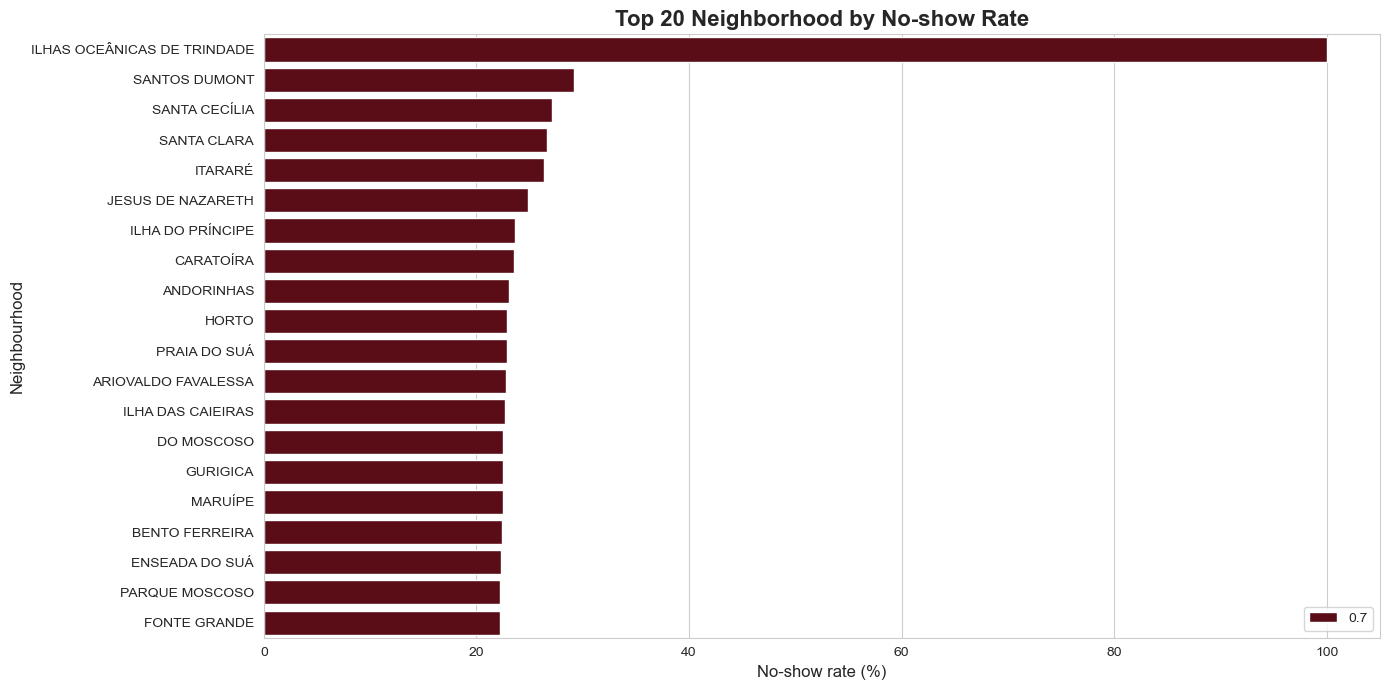

In [79]:
# Replot with a new shade
plt.figure(figsize=(14, 7))
sns.set_style("whitegrid")
sns.barplot(
    data=cross_tab_neigh.head(20),
    x="%-Noshow",
    y="Neighbourhood",
    palette="Reds_r",
    hue=0.7
)
plt.title("Top 20 Neighborhood by No-show Rate", fontsize=16, weight="bold")
plt.xlabel("No-show rate (%)", fontsize=12)
plt.ylabel("Neighbourhood", fontsize=12)
plt.tight_layout()
plt.show()

### No-show Rate by Neighbourhood

This chart highlights the top 20 neighbourhoods with the highest no-show rates. These areas may benefit from targeted interventions such as community outreach, SMS/call reminders, or better transportation access.

### Observations:

- SANTOS DUMONT, SANTA CECÍLIA, and SANTA CLARA show no-show rates above 25%, indicating significant attendance challenges. Most other neighborhoods in the top 20 fall between 18%–24% no-show rate. Some of these areas may reflect socioeconomic factors, distance to clinics, or awareness levels influencing adherence.
- Most other neighborhoods in the top 20 fall between 18%–24% no-show rate.
- Some of these areas may reflect socioeconomic factors, distance to clinics, or awareness levels influencing adherence.

Understanding these patterns enables localized solutions to reduce no-show and improve public health impact.

In [57]:
# Function to generate cross-tab with no-show percentage calculation
def get_cross_tab(df, col1, col2):
    cross_tab = pd.crosstab(
        index=df[col1],
        columns=df[col2],
        values=df[col2],
        aggfunc="count",
        margins=False
    )

    # Calculate no-show percentage
    cross_tab["%-Noshow"] = round((cross_tab["Yes"] / (cross_tab["Yes"] + cross_tab["No"])) * 100, 2)

    # Sort by no-show rate (optional: or by total count)
    cross_tab = cross_tab.sort_values(by="%-Noshow", ascending=False)

    # Reset index for plotting
    cross_tab.reset_index(inplace=True)

    return cross_tab

In [67]:
# Function to plot vertical bar chart from cross-tab
def plot_cross_tab(df, x_col, y_col, title, x_label, y_label, palette="Blues_r"):
    plt.figure(figsize=(14, 7))
    sns.set_style("whitegrid")
    sns.barplot(
        data=df,
        x=x_col,
        y=y_col,
        palette=palette,
        hue=0.7,
        legend=True
    )
    plt.title(title, fontsize=16, weight="bold")
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    plt.tight_layout()
    plt.show()

In [70]:
cross_tab_sch = get_cross_tab(dataset_raw, col1="Scholarship", col2="No-show")

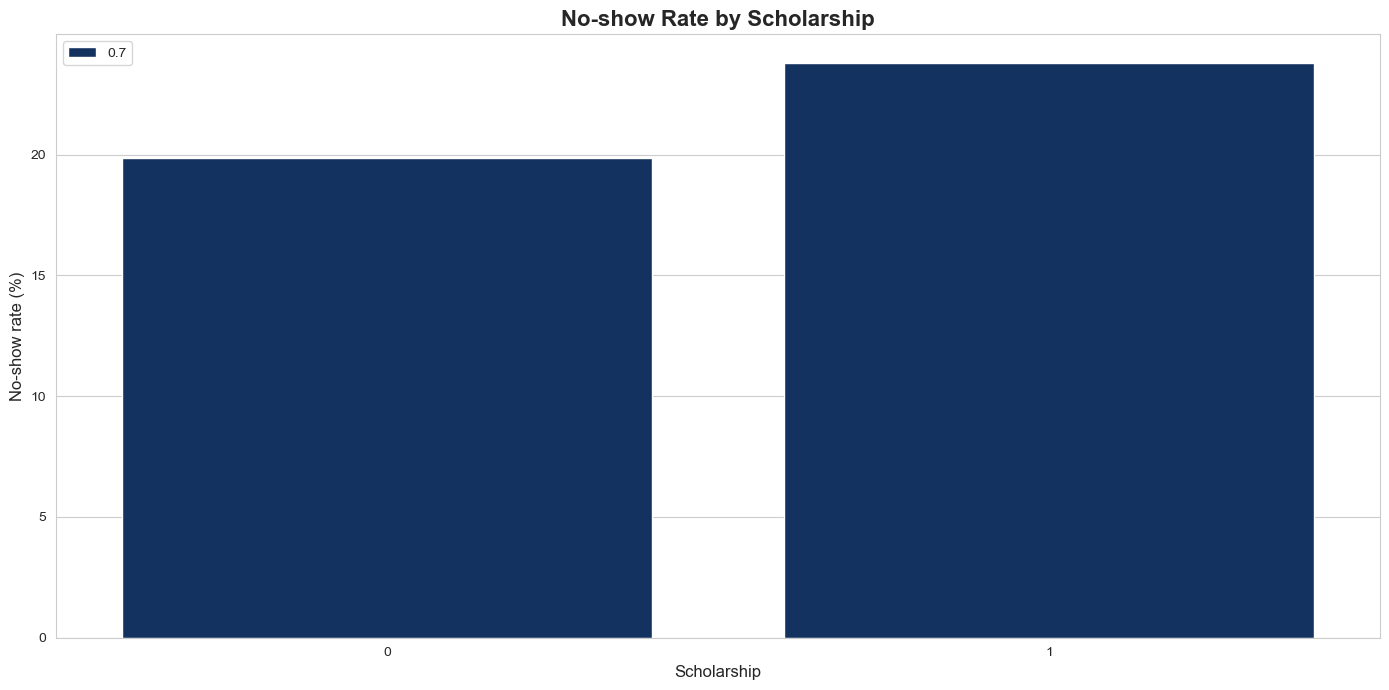

In [72]:
plot_cross_tab(
    cross_tab_sch,
    x_col="Scholarship",
    y_col="%-Noshow",
    title="No-show Rate by Scholarship",
    x_label="Scholarship",
    y_label="No-show rate (%)",
    palette="Blues_r"
)

### No-show Rate by Scholarship Status

This chart compares the no-show rate between patients who received a government scholarship (1) and those who did not (0).
- Patients with a scholarship exhibit a higher no-show rate (~24%) compared to non-recipients (~20%).
- This suggests that while financial support may reduce cost barriers, it might not be enough to ensure adherence — non-financial challenges like access, education, or personal health beliefs could still influence behavior.

### Observations:

Receiving a scholarship does not guarantee better attendance. Targeted education, follow-ups, or community outreach may be needed for this group.

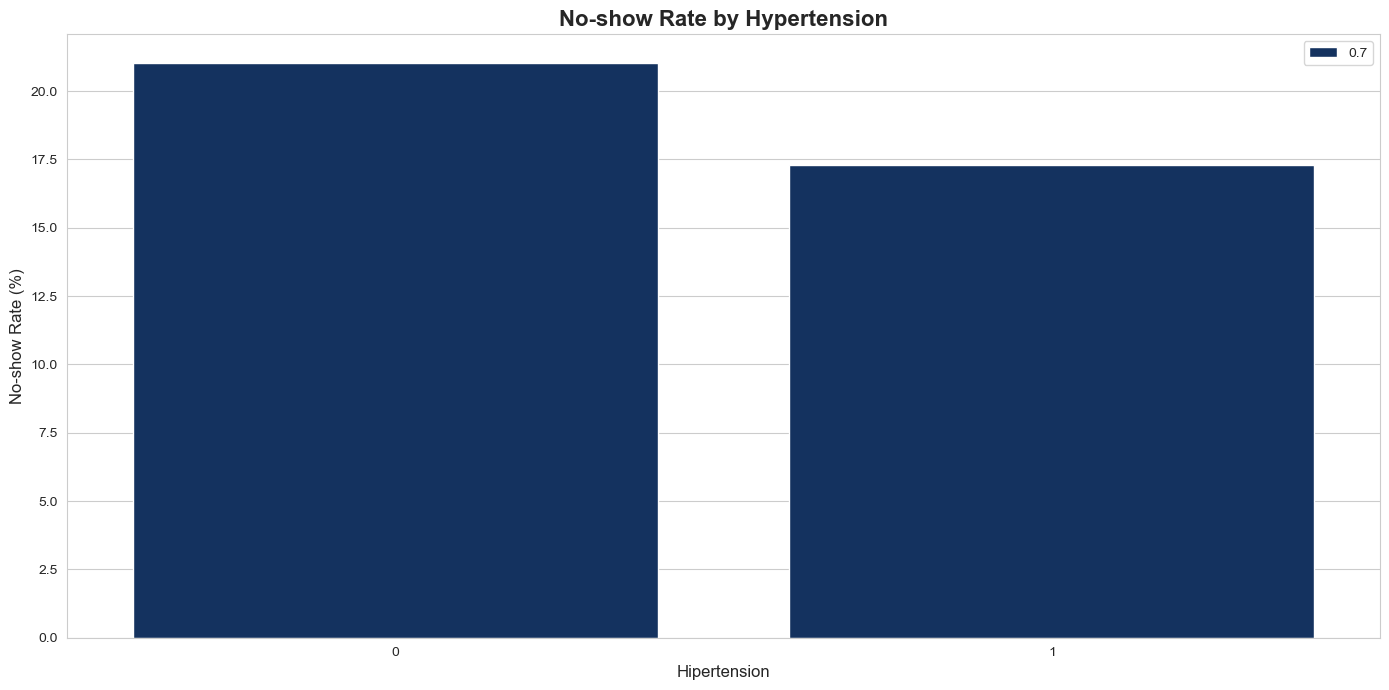

In [73]:
cross_tab_hypT = get_cross_tab(dataset_raw, col1="Hipertension", col2="No-show")

plot_cross_tab(
    cross_tab_hypT,
    x_col="Hipertension",
    y_col="%-Noshow",
    x_label="Hipertension",
    y_label="No-show Rate (%)",
    title="No-show Rate by Hypertension",
    palette="Blues_r"
)

### No-show Rate by Hypertension Status

This bar chart compares the no-show rate between patients with (1) and without (0) a hypertension diagnosis.

- Patients without hypertension have a higher no-show rate (~21%) than those with hypertension (~17.5%).
- This pattern may reflect greater health consciousness or dependency on routine care among patients with chronic conditions.

### Observations:
Patients with hypertension are more likely to adhere to appointments, possibly due to a higher perceived need for continuous care and monitoring.

In [ ]:
cross_tab_diab = get_cross_tab(dataset_raw, col1="Diabetes", col2="No-show")

plot_cross_tab(cross_tab_diab,
               x_col="Diabetes",
               y_col="%-Noshow",
               x_label="Diabetes",
               y_label="No-show Rate (%)",
               title="No-show Rate by Diabetes",
               palette="Blues_r")

### No-show Rate by Diabetes Status
This chart compares no-show rates between patients with diabetes (1) and those without (0).

- Patients with diabetes have a lower no-show rate (~18%) than non-diabetic patients (~20.5%).
- This could reflect a greater urgency for ongoing medical attention and adherence to care among individuals managing chronic illnesses.

### Observation:
Similar to other chronic conditions like hypertension, diabetic patients tend to be more reliable in attending appointments — likely due to the nature of their condition requiring regular follow-ups.

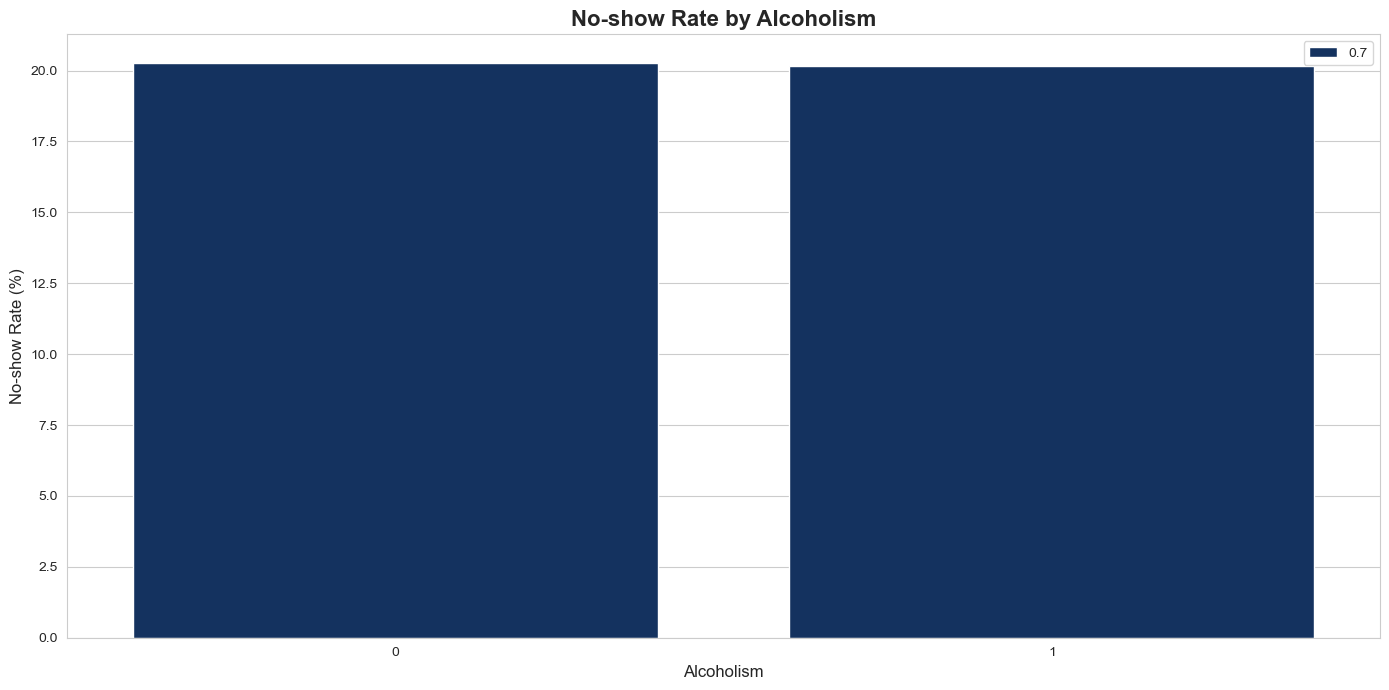

In [74]:
cross_tab_alch = get_cross_tab(dataset_raw, col1="Alcoholism", col2="No-show")

plot_cross_tab(cross_tab_alch,
               x_col="Alcoholism",
               y_col="%-Noshow",
               x_label="Alcoholism",
               y_label="No-show Rate (%)",
               title="No-show Rate by Alcoholism",
               palette="Blues_r")

### No-show Rate by Alcoholism
This chart compares patients who have alcoholism (1) versus those who don’t (0).

- There is little to no difference between the two groups.
- Alcoholism does not appear to significantly influence appointment adherence.

### Observation:
Unlike other chronic conditions, alcoholism doesn't show a clear impact on no-show behavior in this dataset.

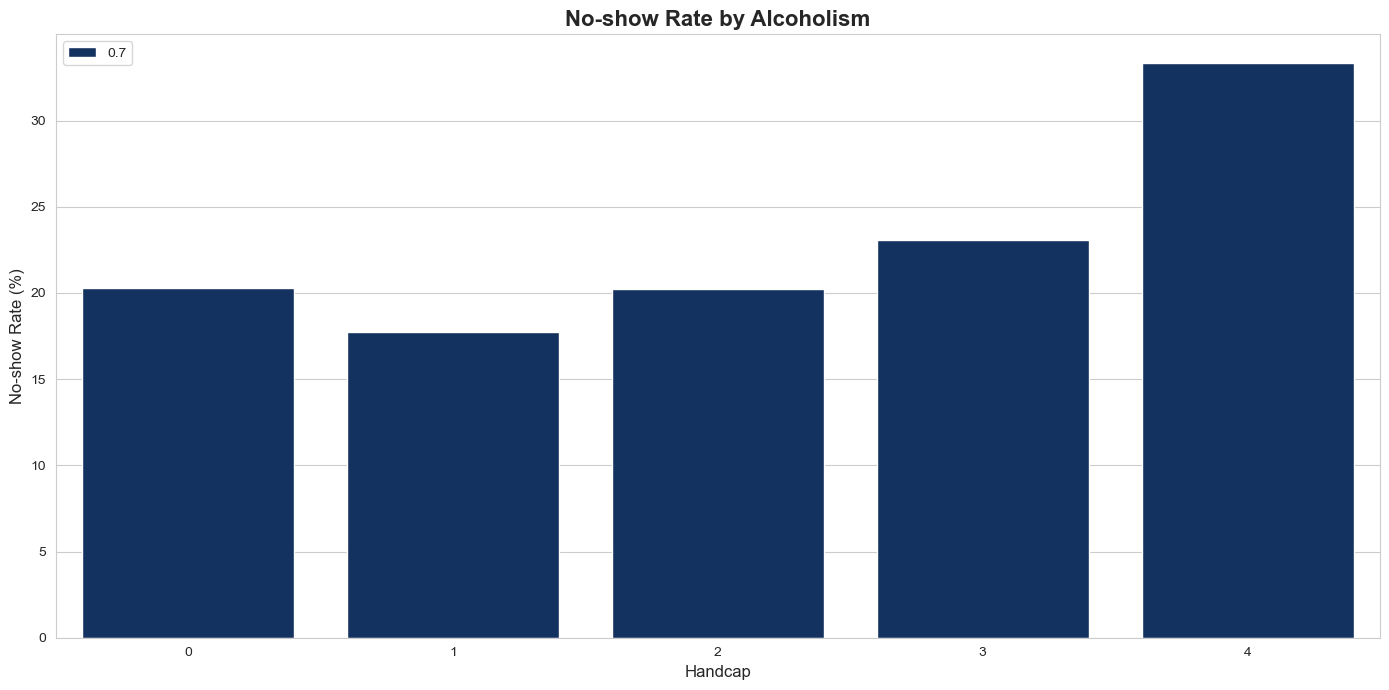

In [75]:
cross_tab_hand_cap = get_cross_tab(dataset_raw, col1="Handcap", col2="No-show")

plot_cross_tab(cross_tab_hand_cap,
               x_col="Handcap",
               y_col="%-Noshow",
               x_label="Handcap",
               y_label="No-show Rate (%)",
               title="No-show Rate by Alcoholism",
               palette="Blues_r")

### No-show Rate by Handicap Level¶
This chart breaks down no-show rates across different handicap levels (0–4).

- Patients with higher handicap levels (3–4) show a noticeable increase in no-show rates, especially level 4 (~33%).
- This could be due to mobility challenges, transportation barriers, or caregiver dependency.

### Observation:
As handicap severity increases, so does the no-show rate. These patients may need extra support or home-based care options to reduce missed visits.

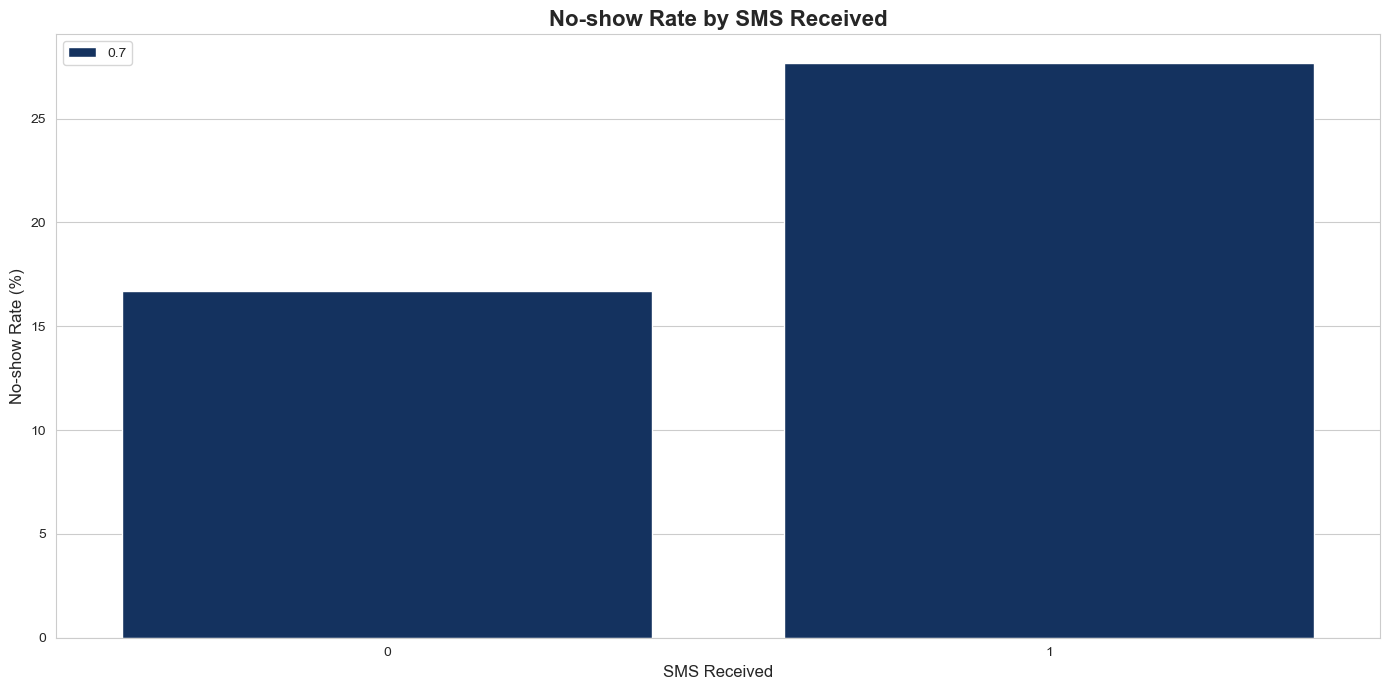

In [80]:
cross_tab_sms = get_cross_tab(dataset_raw, col1="SMS_received", col2="No-show")

plot_cross_tab(cross_tab_sms,
               x_col="SMS_received",
               y_col="%-Noshow",
               x_label="SMS Received",
               y_label="No-show Rate (%)",
               title="No-show Rate by SMS Received",
               palette="Blues_r")

### No-show Rate by SMS Reminder
Above chart compares no-show rates between patients who did not receive an SMS (0) and those who did (1).

- Surprisingly, patients who received an SMS had a higher no-show rate (~27%) compared to those who did not (~16%).
- This could indicate that SMS alone is not effective — or perhaps messages were sent too late, ignored, or not understood.

### Observation:
SMS reminders alone may not be sufficient. Consider timing, message clarity, or combining SMS with phone calls or in-person outreach.

In [81]:
# Function to write the cleaned dataset to a CSV file and save into the processed folder
def save_cleaned_data(df, file_path):
    df.to_csv(file_path, index=False)
    print(f"Cleaned dataset saved to {file_path}")

# Save the cleaned dataset. Delete it if exists
import os
if os.path.exists('../data/processed/medical_appointment_no_show_cleaned.csv'):
    os.remove('../data/processed/medical_appointment_no_show_cleaned.csv')
save_cleaned_data(dataset_raw, '../data/processed/medical_appointment_no_show_cleaned.csv')

Cleaned dataset saved to ../data/processed/medical_appointment_no_show_cleaned.csv
